IMPORT LIBRARIES

In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

LOAD DATASET

In [187]:
Sales_data = pd.read_csv("Dataset.csv", encoding= "ISO-8859-1")

In [188]:
print(Sales_data.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [189]:
print(Sales_data.shape)

(9994, 21)


In [190]:
print(Sales_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [191]:
print(Sales_data.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


DATA CLEANING AND PREPARATION

In [192]:
Sales_data.dropna(inplace=True)

In [193]:
Sales_data.columns=Sales_data.columns.str.strip().str.lower()

In [194]:
Sales_data.columns = Sales_data.columns.str.strip().str.lower()

CONVERT DATA TYPE

In [195]:
Sales_data['order date'] = pd.to_datetime(Sales_data['order date'])


EXPLORATORY DATA ANALYSIS  

<function matplotlib.pyplot.show(close=None, block=None)>

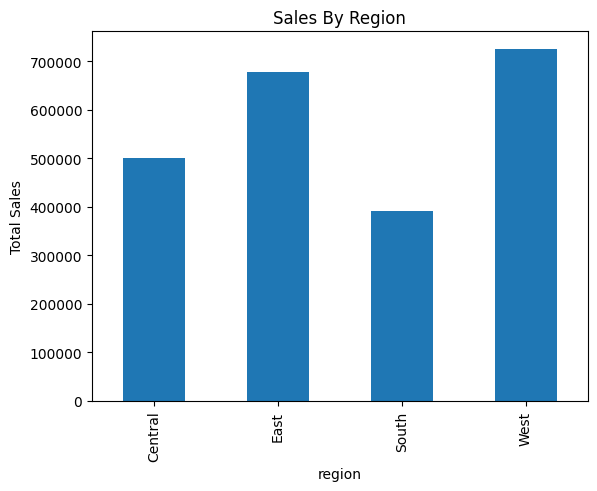

In [196]:
# Sales by Region

sales_by_region = Sales_data.groupby("region")["sales"].sum()

sales_by_region.plot(kind="bar", title = "Sales By Region")
plt.ylabel("Total Sales")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

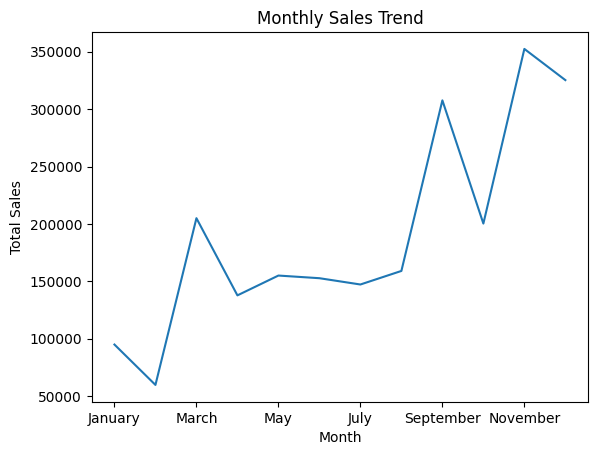

In [197]:
# Monthly Total Sales

Sales_data["Month"]=Sales_data["order date"].dt.month
sales_by_month = Sales_data.groupby("Month")["sales"].sum()
sales_by_month.index = sales_by_month.index.map(lambda x : calendar.month_name[x])

sales_by_month.plot(kind="line", title="Monthly Sales Trend")

plt.ylabel("Total Sales")
plt.show

In [198]:
# Sales_data.columns=Sales_data.columns.str.strip().str.lower()

<function matplotlib.pyplot.show(close=None, block=None)>

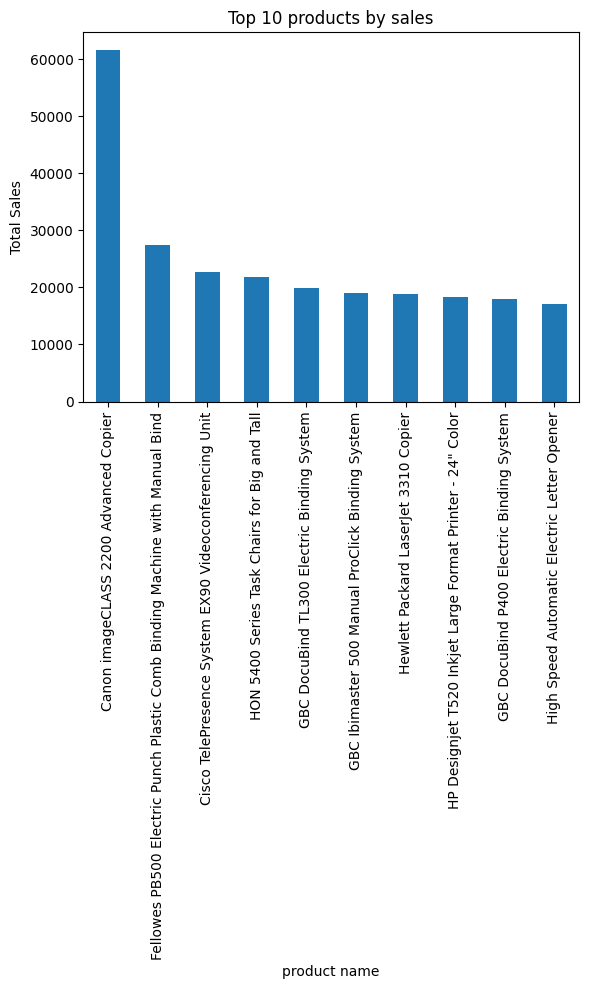

In [199]:
# Product wise total sales

top_product=Sales_data.groupby("product name")["sales"].sum().sort_values(ascending=False)

top_product.head(10).plot(kind="bar", title="Top 10 products by sales")
plt.ylabel("Total Sales")
plt.show

REGIONAL PERFORMANCE

In [200]:
#Sort regions by sales
sales_by_region_sorted = sales_by_region.sort_values(ascending=False)

print(f"Top Regions:{sales_by_region_sorted.idxmax()}with sales of {sales_by_region_sorted.max()}")

Top Regions:Westwith sales of 725457.8245


TIME BASED ANALYSIS

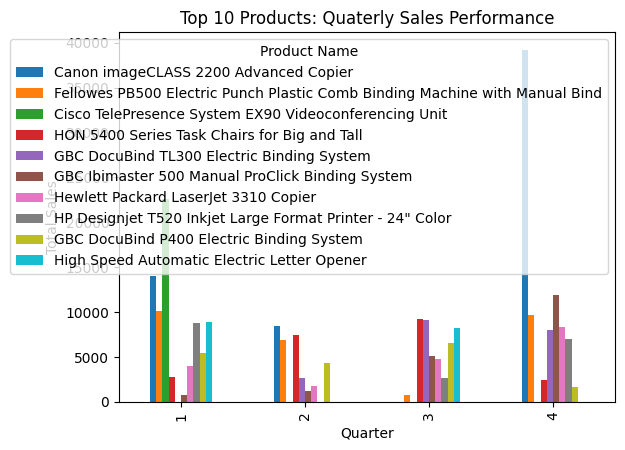

In [206]:
# Quarterly sales
Sales_data['Quarter'] = Sales_data['order date'].dt.quarter
sales_by_quarter_product = Sales_data.groupby(["Quarter", "product name"])['sales'].sum().unstack()

top_10_products = sales_by_quarter_product.sum(axis=0).nlargest(10).index

top_10_sales_by_quarter_products = sales_by_quarter_product[top_10_products]
# Plot quarterly sales trends
top_10_sales_by_quarter_products.plot(kind='bar', title='Top 10 Products: Quaterly Sales Performance')
plt.ylabel('Total Sales')
plt.xlabel("Quarter")
plt.legend(title="Product Name")
plt.show()


HIGHEST BUYER FROM ALL CUSTOMERS

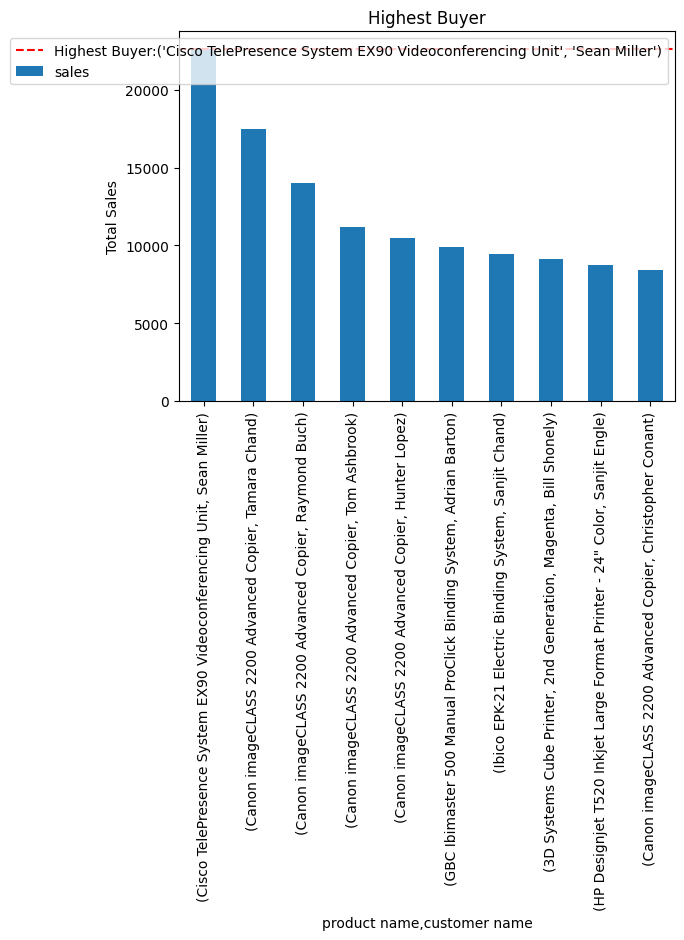

In [207]:
# Highest Buyer with Product
highest_buyer = Sales_data.groupby(["product name", "customer name"])["sales"].sum()

highest_buyer_sorted = highest_buyer.sort_values(ascending=False)
highest_buyer = highest_buyer_sorted.idxmax()
highest_sales = highest_buyer_sorted.max()
top_10_customer = highest_buyer_sorted.head(10)

top_10_customer.plot(kind="bar", title="Highest Buyer")
plt.ylabel("Total Sales")

plt.axhline(y=highest_sales, color ="r", linestyle="--", label=f"Highest Buyer:{highest_buyer}")
plt.legend()
plt.show()


CONSLUSION
1)  Top Regions:Westwith sales of 725457.8245
2)  In quaterly sale we can see the product Canon    Image is having the highest sales
3) Sean Milter is the highest buyer